In [16]:
#Importing Libraries
from sklearn.svm import SVR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn import metrics

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [17]:
#Reading dataset
data = pd.read_csv('FINAL_USO.csv')

data.head(30)
data.shape

(1718, 81)

In [18]:
#Grab features and label from dataframe
x = data[['Open','High', 'Low','Volume','SP_open','SP_high','SP_low','SP_close','SP_Ajclose','SP_volume','DJ_open','DJ_high','DJ_low','DJ_close','DJ_Ajclose','DJ_volume','EG_open','EG_high','EG_low','EG_close','EG_Ajclose','EG_volume','EU_Price','EU_open','EU_high','EU_low','EU_Trend','OF_Price','OF_Open','OF_High','OF_Low','OF_Volume','OF_Trend','OS_Price','OS_Open','OS_High','OS_Low','OS_Trend','SF_Price','SF_Open','SF_High','SF_Low','SF_Volume','SF_Trend','USB_Price','USB_Open','USB_High','USB_Low','USB_Trend','PLT_Price','PLT_Open','PLT_High','PLT_Low','PLT_Trend','PLD_Price','PLD_Open','PLD_High','PLD_Low','PLD_Trend','RHO_PRICE','USDI_Price','USDI_Open','USDI_High','USDI_Low','USDI_Volume','USDI_Trend','GDX_Open','GDX_High','GDX_Low','GDX_Close','GDX_Adj Close','GDX_Volume','USO_Open','USO_High','USO_Low','USO_Close','USO_Adj Close','USO_Volume']].values
y = data['Adj Close'].values

In [19]:
import random
import numpy as np

num_features = random.randint(1, 79)

# Get the number of columns in the x array
num_columns = x.shape[1]
print(x.shape[1])

# Generate a list of column indices and randomly select num_features of them
selected_columns = random.sample(range(num_columns), num_features)

# Use boolean indexing to select the corresponding columns from the x array
X = x[:, selected_columns]

print(X)


78
[[ 80.565    154.740005  80.13     ... 106.5       72.150002  36.049999]
 [ 80.175    154.309998  79.935    ... 104.56      73.349998  35.73    ]
 [ 80.3      155.479996  80.125    ... 104.57      64.199997  35.93    ]
 ...
 [ 96.46     120.57      95.935    ...  54.67       2.9        9.37    ]
 [ 96.02     120.800003  95.74     ...  53.8        2.85       9.38    ]
 [ 95.965    120.980003  95.585    ...  54.82       2.73       9.44    ]]


In [20]:
##################################Splitting data#############################
#X_train,X_test,y_train,y_test=train_test_split(data.drop('Outcome',axis=1),data['Outcome'],test_size=0.20,random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=14, shuffle =True)
#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1374, 30)
X_test shape is  (344, 30)
y_train shape is  (1374,)
y_test shape is  (344,)


In [21]:
##################################Scaling Data###############################
xsd = StandardScaler()
X_train = xsd.fit_transform(X_train)
X_test =  xsd.transform(X_test)

In [22]:
#Applying SVR 
'''
sklearn.svm.SVR(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True,
                probability=False, tol=0.001, cache_size=200, class_weight=None,verbose=False,
                max_iter=-1, decision_function_shape='ovr’, random_state=None)
'''
start = 0.001
stop = 1.500
step = 0.001
ACC = 0
for i in range(int((stop - start) / step) + 1):
    value = start + i * step
    SVRModel = SVR(kernel= 'rbf', max_iter=10000,C=value,gamma='auto')
    SVRModel.fit(X_train, y_train)
    

    ACC =max(ACC, SVRModel.score(X_train,y_train))
    
print('***********Train*********************')
y_pred = SVRModel.predict(X_train)
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Compute the predicted target values for the training set
y_pred_train = SVRModel.predict(X_train)

# Compute the RMSE and MAE for the training set
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
mae_train = mean_absolute_error(y_train, y_pred_train)

print("Training set evaluation:")
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)
print('Accuracy is : \n', ACC)
print('--------------------------------')

***********Train*********************
Training set evaluation:
RMSE:  1.920610341419811
MAE:  1.253712555444951
Accuracy is : 
 0.9881851685799572
--------------------------------


In [23]:
ACC = SVRModel.score(X_test,y_test)
print('Accuracy is : \n', ACC)
print('--------------------------------')

Accuracy is : 
 0.9883164836644855
--------------------------------


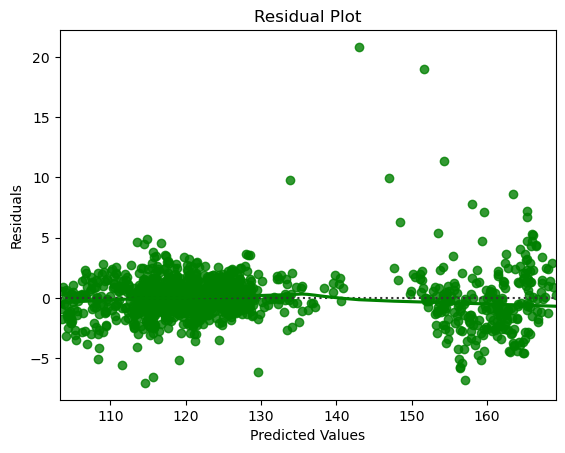

In [26]:
import seaborn as sns
residuals = y_train - y_pred

sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()